<a href="https://colab.research.google.com/github/Hamid-Mofidi/PNP/blob/main/Q2contribution/Q2-2nd-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PNP: Higher order contributions of permanent charge on ionic flows

In [119]:
import numpy as np
import matplotlib.pyplot as plt

In [120]:
def zeroth_order_terms(V, alpha, beta, L, R, z1, z2):
    c10a = (1/z1) * ((1 - alpha) * L + alpha * R)
    c20a = (-z1/z2) * c10a
    c10b = (1/z1) * ((1 - beta) * L + beta * R)
    c20b = (-z1/z2) * c10b
    phi0a = V * (np.log(((1 - alpha) * L + alpha * R)) - np.log(R)) / (np.log(L) - np.log(R))
    phi0b = V * (np.log(((1 - beta)  * L + beta * R)) - np.log(R)) / (np.log(L) - np.log(R))
    y0 = ((1.0 / ((z1 - z2) * (L - R))) * np.log(((1 - alpha) * L + alpha * R) / ((1 - beta) * L + beta * R)))
    J10 = ((L - R) / (z1 * (np.log(L) - np.log(R)))) * (z1 * V + np.log(L) - np.log(R))
    J20 = ((R - L) / (z2 * (np.log(L) - np.log(R)))) * (z2 * V + np.log(L) - np.log(R))
    return c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20

In [121]:
def first_order_terms(V, alpha, beta, L, R, z1, z2):
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V, alpha, beta, L, R, z1, z2)
    c11a = (z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - (1 / (2 * (z1 - z2)))
    c21a = (z1 * alpha * (phi0b - phi0a) / (z2 - z1)) - (1 / (2 * (z2 - z1)))
    c11b = (z2 * (1 - beta) * (phi0a - phi0b) / (z1 - z2)) - (1 / (2 * (z1 - z2)))
    c21b = (z1 * (1 - beta) * (phi0a - phi0b) / (z2 - z1)) - (1 / (2 * (z2 - z1)))
    c1L  = L / z1
    c1R  = R / z1
    T0   =   J10 +  J20

    A = -((beta - alpha) * (L - R) ** 2) / (((1 - alpha) * L + alpha * R) * ((1 - beta) * L + beta * R) * (np.log(L) - np.log(R)))
    B = ( np.log(((1 - beta) * L + beta * R)) - np.log(((1 - alpha) * L + alpha * R))  ) / A

    lambda_val = V / (np.log(L) - np.log(R))
    phi1a = ((1 + z1 * lambda_val) * (1 + z2 * lambda_val) * (c10b - c10a) * (np.log(c1L) - np.log(c10a))) / (z1 * (z1 - z2) * c10a * c10b * (np.log(c1R) - np.log(c1L))) \
                  + (1 / (2 * z1 * (z1 - z2) * c10a)) + (lambda_val * ((z2 * alpha * (phi0b - phi0a)) / ((z1 - z2) * c10a) ) )
    phi1b = ((1 + z1 * lambda_val) * (1 + z2 * lambda_val) * (c10b - c10a) * (np.log(c1R) - np.log(c10b))) / (z1 * (z1 - z2) * c10a * c10b * (np.log(c1R) - np.log(c1L))) \
                  + (1 / (2 * z1 * (z1 - z2) * c10b)) + (lambda_val * ((z2 * (1 - beta) * (phi0a - phi0b)) / ((z1 - z2) * c10b) ) )
    y1 = (((1 - beta) * c1L + alpha * c1R) * (phi0a - phi0b)) / (z1 * (z1 - z2) * T0 * c10a * c10b) \
           + ((np.log(c10a) - np.log(c10b)) * (phi0a - phi0b)) / (z1 * (z1 - z2) * T0 * (c1L - c1R)) \
            - (((z2 * J10 + z1 * J20) * (c10a - c10b)) / (z1 ** 2 * z2 * (z1 - z2) * T0 ** 2 * c10a * c10b))
    J11 = ( (A * (z2 * (1 - B) * V + np.log(L) - np.log(R))) / ((z1 - z2) * (np.log(L) - np.log(R))**2) ) * (z1 * V + np.log(L) - np.log(R))
    J21 = ( (A * (z1 * (1 - B) * V + np.log(L) - np.log(R))) / ((z2 - z1) * (np.log(L) - np.log(R))**2) ) * (z2 * V + np.log(L) - np.log(R))


    return c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21

In [122]:
# Define the parameter values
alpha = 1/3
beta = 2/3
z1 = 1
z2 = -1
L  = 1
R  = 2

A = -((beta - alpha) * (L - R) ** 2) / (((1 - alpha) * L + alpha * R) * ((1 - beta) * L + beta * R) * (np.log(L) - np.log(R)))
B = ( np.log(((1 - beta) * L + beta * R)) - np.log(((1 - alpha) * L + alpha * R))  ) / A

Vq1 = (np.log(R) - np.log(L)) / (z2 * (1 - B))   # obtained from Theorem 4.8 in 2015 paper (Effects of small permanent charge...)
Vq2 = (np.log(R) - np.log(L)) / (z1 * (1 - B))

Vqmin = np.min([Vq1, Vq2])  #Vq1, Vq2 are still scalars
Vqmax = np.max([Vq1, Vq2])

V1_range = np.linspace(Vqmin-180, Vqmin, 200)
V2_range = np.linspace(Vqmin, Vqmax, 200)   # see theorem 4.8 on the paper "Effects of small permanent charge... 2015"
V3_range = np.linspace(Vqmax, Vqmax+180, 200)

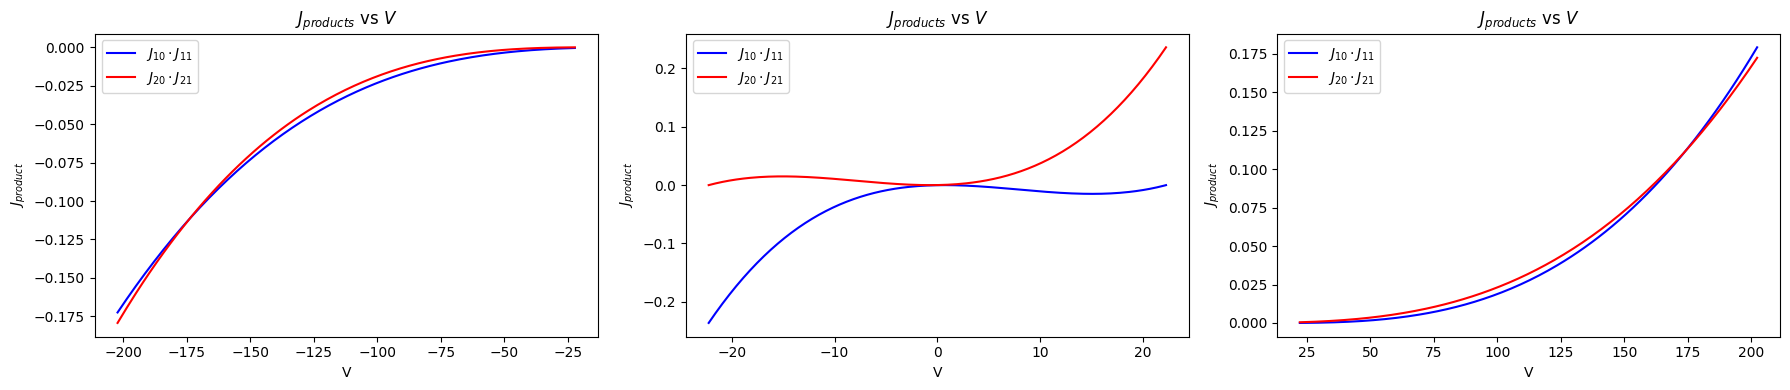

In [136]:
# Create a list of V ranges
V_ranges = [V1_range, V2_range, V3_range]

# Iterate over the ranges and call zeroth_order_terms
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Iterate over the ranges and call zeroth_order_terms
for i, V_range in enumerate(V_ranges, 1):
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
    c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
    Q = 0.01
    J1_prd = J10 * J11
    J2_prd = J20 * J21
    # Calculate the magnitude (absolute value) of J1_prd2, J2_prd2
    magnitude1 = np.linalg.norm(J1_prd)
    magnitude2 = np.linalg.norm(J2_prd)

    # Normalize
    normalized_J1_prd = J1_prd / magnitude1
    normalized_J2_prd = J2_prd / magnitude2

    # Plot on the corresponding subplot
    axs[i-1].plot(V_range, normalized_J1_prd, color='blue', label='$J_{10} \cdot J_{11}$')
    axs[i-1].plot(V_range, normalized_J2_prd, color='red', label='$J_{20} \cdot J_{21}$')
    axs[i-1].set_xlabel('V')
    axs[i-1].set_ylabel('$J_{{product}}$')
    # Create the title dynamically based on the values of Vqmin and Vqmax

    title = f'$J_{{products}}$ vs $V$'


    axs[i-1].set_title(title)
    axs[i-1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [131]:
#print(J10)
#print(J11)
#print(J10*J11)
#print(A)
#print(B)

In [125]:
 def second_order_terms(V, alpha, beta, L, R, z1, z2):
     # Constants
     c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V, alpha, beta, L, R, z1, z2)
     c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V, alpha, beta, L, R, z1, z2)
     H1 = 1.0
     phiL = V
     phiR = 0.0
     c1L  = L / z1
     c1R  = R / z1
     T0   = J10 +  J20
     T1   = J11 +  J21
     I1   = z1*J11 + z2*J21

     # Intermediate calculations
     A1 = -z1 * (c1L - c10a) / (alpha * H1 * (np.log(c1L) - np.log(c10a)))
     B1 = z1 * (c10b - c1R) / ((1 - beta) * H1 * (np.log(c10b) - np.log(c1R)))
     A2 = (z1 * z2 * (phi0a - phi0b) * (1 / z1 + (phiL - phi0a) / (np.log(c1L) - np.log(c10a))
           - (phiL - phi0a) * (c1L - c10a) / ((np.log(c1L) - np.log(c10a))**2 * c10a)))
     B2 = (z1 * z2 * (phi0a - phi0b) * (1 / z1 + (phi0b - phiR) / (np.log(c10b) - np.log(c1R))
           - (phi0b - phiR) * (c10b - c1R) / ((np.log(c10b) - np.log(c1R))**2 * c10b)))
     # Constants
     C1L = z1**2 * c11a + z2**2 * c21a
     C1R = z1**2 * c11b + z2**2 * c21b
     C2 = (z1 + z2) * (c10b**2 - c10a**2) / (12 * (z1 * (z1 - z2) * c10a * c10b)**2)
     I1_term = I1 * y1

     #Compute C:
     # First term
     C = -(C1L / (2 * z1 * (z1 - z2) * c10a)**2) + (C1R / (2 * (z1 * (z1 - z2) * c10b)**2)) + C2
     # Second term
     term2 = ((z1 - z2) * (L - R) * V * y1) / (H1 * (np.log(L) - np.log(R)) * c10a)
     term2 -= (z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - (c10a * (phi0a - phi0b) / (H1 * T0)) - (1 / (z1 - z2))
     # Third term
     term3 = (0.5 * z2 * V / (z1 * (z1 - z2)**2 * (np.log(L) - np.log(R)))) * (1 / c10a**2 - 1 / c10b**2)
     # Fourth term
     term4 = (z1 * z2 * (phi1a - phi1b) * V / (np.log(L) - np.log(R)))
     term4 *= (1 / (z1 * (z1 - z2))) * (alpha / c10a + (1 - beta) / c10b) + y0 / H1
     # Fifth term
     term5 = (0.5 * z1**2 * z2**2 * V * (T0 * y1 + T1 * y0)**2 / (np.log(L) - np.log(R)))
     # Sixth term
     term6 = (z1 * z2 * V * (phi0a - phi0b) * y0 / (H1 * c10a * (np.log(L) - np.log(R))))
     term6 *= z2 * alpha * (phi0b - phi0a) / (z1 - z2) - 1 / (z1 - z2)
     # Seventh term
     term7 = (J11 * V / (z1 * T0 * (np.log(L) - np.log(R)))) * (1 / c10b - 1 / c10a)
     # Eighth term
     term8 = (J10 * (phi0a - phi0b) * V / (z1 * T0**2 * H1 * (np.log(L) - np.log(R)))) * (1 / c10b - 1 / c10a)
     # Combine all terms
     C += term2 + term3 - term4 - term5 + term6 + term7 + term8

     # Calculate c12a, c22a, c12b, c22b
     c12a = (-((z1 + 4 * z2) / (24 * z1 * (z1 - z2)**2 * c10a)) -
             ((phi0a - phi0b) * alpha * z2) / (z1 - z2))
     c22a = ((4 * z1 + z2) / (24 * z1 * (z1 - z2)**2 * c10a) +
             ((phi0a - phi0b) * alpha * z1) / (z1 - z2))
     c12b = (-((z1 + 4 * z2) / (24 * z1 * (z1 - z2)**2 * c10b)) +
             ((phi0a - phi0b) * (1 - beta) * z2) / (z1 - z2))
     c22b = ((4 * z1 + z2) / (24 * z1 * (z1 - z2)**2 * c10b) -
             ((phi0a - phi0b) * (1 - beta) * z1) / (z1 - z2))

     # Calculate phi2a, phi2b
     phi2a = ((B1 * C - (z1 - z2) * y0 * B1 * A2 - z2 * y0 * B1 * (phi1b - phi1a) / H1 +
               B2 - A2) / (A1 - B1 + (z1 - z2) * y0 * A1 * B1))
     phi2b = ((1 - (z1 - z2) * y0 * A1) * phi2a + C - (z1 - z2) * y0 * A2 - z2 * y0 * (phi1b - phi1a) / H1)


     y2 = (y0 * (phi1a - phi1b) / (H1 * T0) - (y1 / c10a) * (z2 * alpha * (phi0b - phi0a) / (z1 - z2) -
       (c10a * (phi0a - phi0b) / (H1 * T0)) - 1 / (z1 - z2)) +
       (0.5 / (z1**2 * (z1 - z2)**2 * T0)) * (1 / c10a**2 - 1 / c10b**2) +
       ((phi1a - phi1b) / (z1 * (z1 - z2) * T0)) * (alpha / c10a + (1 - beta) / c10b) -
       (z1 * z2 / (2 * T0)) * (T0 * y1 + T1 * y0)**2 +
       (((phi0a - phi0b) * y0) / (H1 * T0 * c10a)) * ((z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - 1 / (z1 - z2)) +
       (J11 / (z1**2 * z2 * T0**2)) * (1 / c10b - 1 / c10a) +
       (J10 * (phi0a - phi0b) / (z1**2 * z2 * T0**3 * H1)) * (1 / c10b - 1 / c10a)
       )




     # Calculate J12:
     J12_term1 = (z1 * z2 * (phi1a - phi1b) / (H1 * (z1 - z2)))
     J12_term1 *= ((1 / z1) + (phiL - phi0a) / (np.log(c1L) - np.log(c10a)) - (phiL - phi0a) * (c1L - c10a) / ((np.log(c1L) - np.log(c10a))**2 * c10a))

     J12_term2 = z1 * (c1L - c10a) / (alpha * H1 * (np.log(c1L) - np.log(c10a)))
     J12_term2 *= (phi2a + z1 * z2 * alpha * (phi0b - phi0a) / (2 * (z1 * (z1 - z2) * c10a)**2) - (z1 + z2) / (6 * (z1 * (z1 - z2) * c10a)**2))

     J12_term3 = z1 * z2 * (phi0a - phi0b) / (H1 * (np.log(c1L) - np.log(c10a) * (z1 - z2)**2))
     J12_term3 *= (z1 - z2) * phi1a - ( (z1 - z2) * (c1L - c10a) * phi1a / ((np.log(c1L) - np.log(c10a)) * c10a) ) - 1 / (2 * z1 * c10a) + (c1L - c10a) / (2 * z1 * (np.log(c1L) - np.log(c10a)) * (c10a**2))
     J12_term3 += z2 * (c11a + c21a) * (phiL - phi0a) * (c1L + c10a) / (2 * (np.log(c1L) - np.log(c10a)) * (c10a**2))

     J12 = J12_term1 - J12_term2 - J12_term3

     # Calculate J22:
     J22_term1 = (z1 * z2 * (phi1a - phi1b) / (H1 * (z2 - z1)))
     J22_term1 *= ((1 / z2) + (phiL - phi0a) / (np.log(c1L) - np.log(c10a)) - (phiL - phi0a) * (c1L - c10a) / ((np.log(c1L) - np.log(c10a))**2 * c10a))

     J22_term2 = z1 * (c1L - c10a) / (alpha * H1 * (np.log(c1L) - np.log(c10a)))
     J22_term2 *= (phi2a + z1 * z2 * alpha * (phi0b - phi0a) / (2 * (z1 * (z1 - z2) * c10a)**2) - (z1 + z2) / (6 * (z1 * (z1 - z2) * c10a)**2))

     J22_term3 = z1 * z2 * (phi0a - phi0b) / (H1 * (np.log(c1L) - np.log(c10a) * (z1 - z2)**2))
     J22_term3 *= (z1 - z2) * phi1a - (z1 - z2) * (c1L - c10a) * phi1a / ((np.log(c1L) - np.log(c10a)) * c10a) - 1 / (2 * z1 * c10a) + (c1L - c10a) / (2 * z1 * (np.log(c1L) - np.log(c10a)) * (c10a**2))
     J22_term3 += z2 * (c11a + c21a) * (phiL - phi0a) * (c1L + c10a) / (2 * (np.log(c1L) - np.log(c10a)) * (c10a**2))

     J22 = J22_term1 + J22_term2 + J22_term3






     return c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22


#result = second_order_terms(V, alpha, beta, L, R, z1, z2)
#print(result)


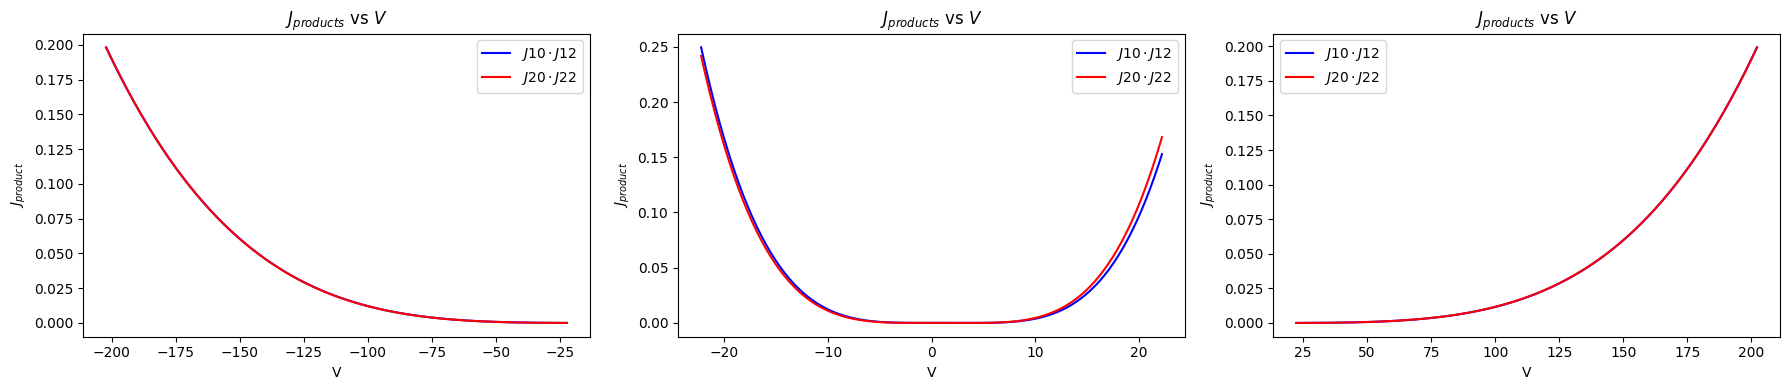

In [132]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Iterate over the ranges and call zeroth_order_terms
for i, V_range in enumerate(V_ranges, 1):
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
    c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
    c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(V_range, alpha, beta, L, R, z1, z2)
    Q = 0.05
    J1_prd2 = J10 * J12
    J2_prd2 = J20 * J22
    # Calculate the magnitude (absolute value) of J1_prd2, J2_prd2
    magnitude1 = np.linalg.norm(J1_prd2)
    magnitude2 = np.linalg.norm(J2_prd2)

    # Normalize
    normalized_J1_prd2 = J1_prd2 / magnitude1
    normalized_J2_prd2 = J2_prd2 / magnitude2


    # Plot on the corresponding subplot
    axs[i-1].plot(V_range, normalized_J1_prd2, color='blue', label='$J10\cdot J12$')
    axs[i-1].plot(V_range, normalized_J2_prd2, color='red', label='$J20\cdot J22$')
    axs[i-1].set_xlabel('V')
    axs[i-1].set_ylabel('$J_{{product}}$')
    #axs[i-1].set_ylabel('$J$')
    # Create the title dynamically based on the values of Vqmin and Vqmax

    title = f'$J_{{products}}$ vs $V$'


    axs[i-1].set_title(title)
    axs[i-1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

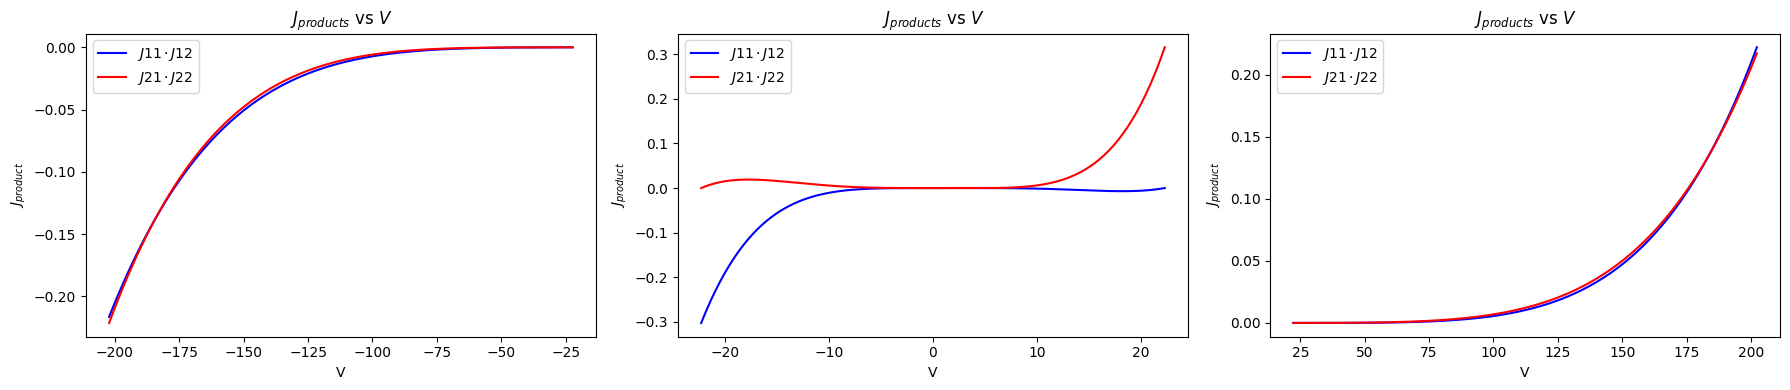

In [127]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Iterate over the ranges and call zeroth_order_terms
for i, V_range in enumerate(V_ranges, 1):
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
    c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
    c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(V_range, alpha, beta, L, R, z1, z2)
    Q = 0.01
    J1_prd2 = J11 * J12
    J2_prd2 = J21 * J22
    # Calculate the magnitude (absolute value) of J1_prd2, J2_prd2
    magnitude1 = np.linalg.norm(J1_prd2)
    magnitude2 = np.linalg.norm(J2_prd2)

    # Normalize
    normalized_J1_prd2 = J1_prd2 / magnitude1
    normalized_J2_prd2 = J2_prd2 / magnitude2

    # Plot on the corresponding subplot
    axs[i-1].plot(V_range, normalized_J1_prd2, color='blue', label='$J11\cdot J12$')
    axs[i-1].plot(V_range, normalized_J2_prd2, color='red', label='$J21\cdot J22$')
    axs[i-1].set_xlabel('V')
    axs[i-1].set_ylabel('$J_{{product}}$')
    #axs[i-1].set_ylabel('$J$')
    # Create the title dynamically based on the values of Vqmin and Vqmax

    title = f'$J_{{products}}$ vs $V$'


    axs[i-1].set_title(title)
    axs[i-1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

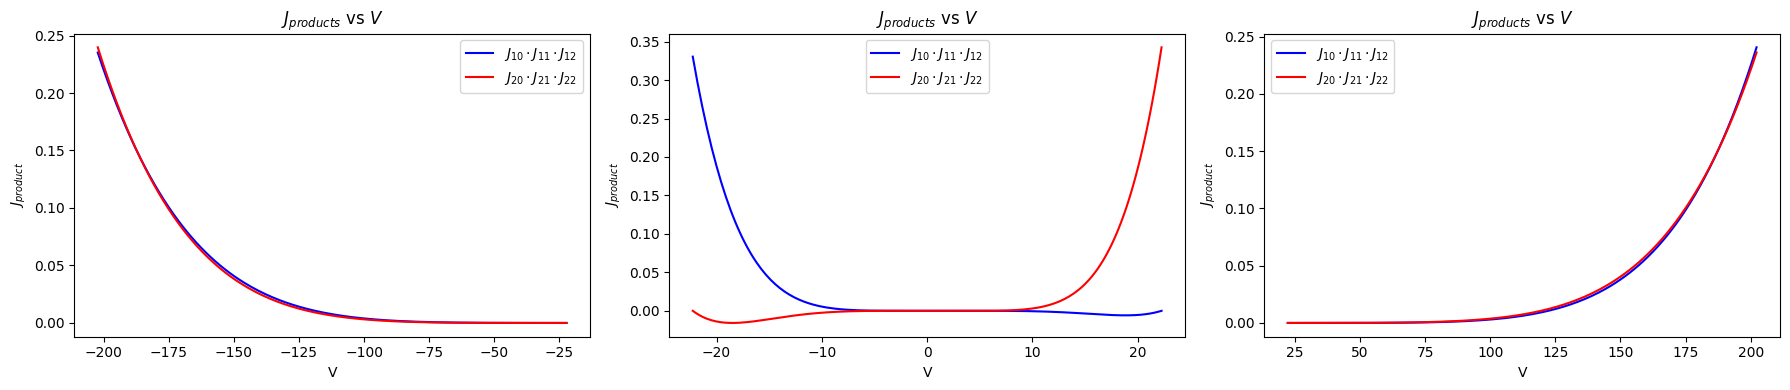

In [128]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Iterate over the ranges and call zeroth_order_terms
for i, V_range in enumerate(V_ranges, 1):
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
    c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
    c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(V_range, alpha, beta, L, R, z1, z2)
    Q = 0.01
    J1_prd2 = J10 * J11 * J12
    J2_prd2 = J20 * J21 * J12
    # Calculate the magnitude (absolute value) of J1_prd2, J2_prd2
    magnitude1 = np.linalg.norm(J1_prd2)
    magnitude2 = np.linalg.norm(J2_prd2)

    # Normalize
    normalized_J1_prd2 = J1_prd2 / magnitude1
    normalized_J2_prd2 = J2_prd2 / magnitude2

    # Plot on the corresponding subplot
    axs[i-1].plot(V_range, normalized_J1_prd2, color='blue', label='$J_{10}\cdot J_{11} \cdot J_{12}$')
    axs[i-1].plot(V_range, normalized_J2_prd2, color='red', label='$J_{20} \cdot J_{21} \cdot J_{22}$')
    axs[i-1].set_xlabel('V')
    axs[i-1].set_ylabel('$J_{{product}}$')
    #axs[i-1].set_ylabel('$J$')
    # Create the title dynamically based on the values of Vqmin and Vqmax

    title = f'$J_{{products}}$ vs $V$'


    axs[i-1].set_title(title)
    axs[i-1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

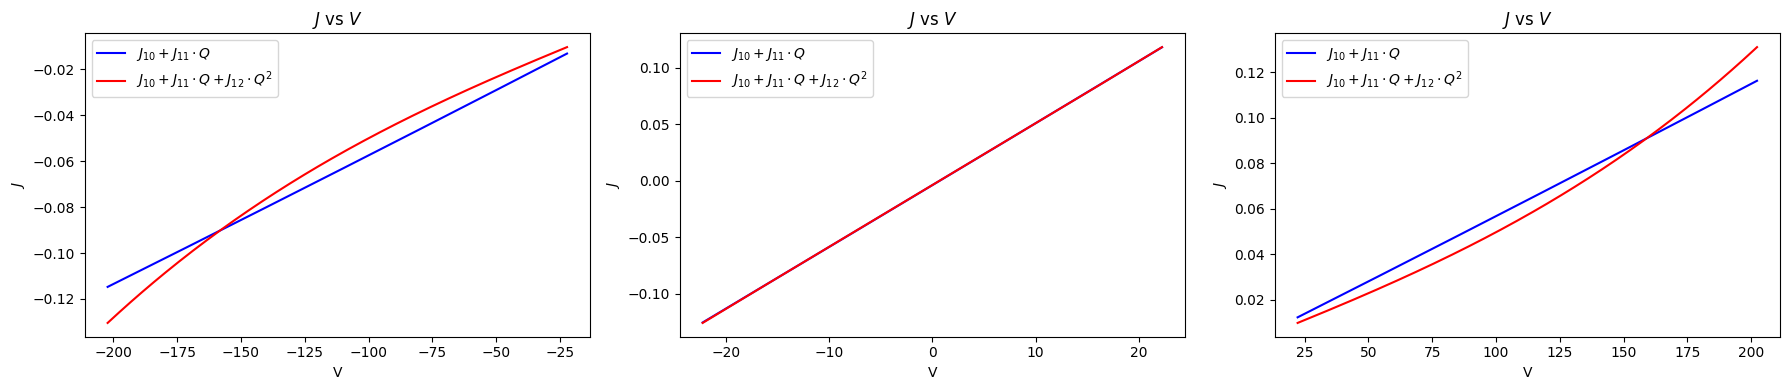

In [140]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Iterate over the ranges and call zeroth_order_terms
for i, V_range in enumerate(V_ranges, 1):
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
    c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
    c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(V_range, alpha, beta, L, R, z1, z2)
    Q = 0.02
    J1_prd2 = J10 + Q * J11
    J2_prd2 = J10 + Q * J11 + Q**2 * J12
    # Calculate the magnitude (absolute value) of J1_prd2, J2_prd2
    magnitude1 = np.linalg.norm(J1_prd2)
    magnitude2 = np.linalg.norm(J2_prd2)

    # Normalize
    normalized_J1_prd2 = J1_prd2 / magnitude1
    normalized_J2_prd2 = J2_prd2 / magnitude2


    # Plot on the corresponding subplot
    axs[i-1].plot(V_range, normalized_J1_prd2, color='blue', label='$J_{10} +  J_{11}\cdot Q$')
    axs[i-1].plot(V_range, normalized_J2_prd2, color='red', label='$J_{10} + J_{11}\cdot Q +  J_{12} \cdot Q^2$')
    axs[i-1].set_xlabel('V')
    axs[i-1].set_ylabel('$J$')
    # Create the title dynamically based on the values of Vqmin and Vqmax

    title = f'$J$ vs $V$'


    axs[i-1].set_title(title)
    axs[i-1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

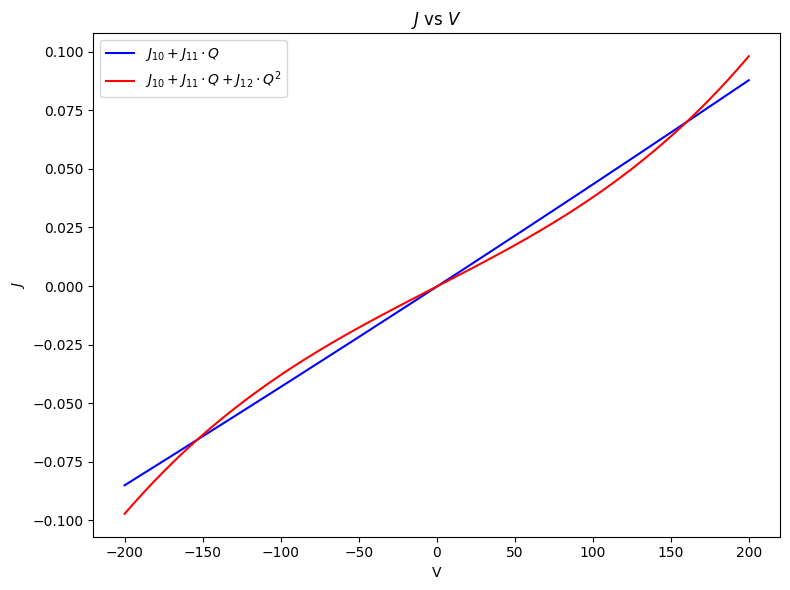

In [141]:
import matplotlib.pyplot as plt
import numpy as np

# Define V range
V_range = np.linspace(-200, 200, 400)  # Adjust the number of points as needed

# Calculate zeroth, first, and second order terms for the entire V_range
c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(V_range, alpha, beta, L, R, z1, z2)
Q = 0.02
J1_prd2 = J10 + Q * J11
J2_prd2 = J10 + Q * J11 + Q**2 * J12
# Calculate the magnitude (absolute value) of J1_prd2, J2_prd2
magnitude1 = np.linalg.norm(J1_prd2)
magnitude2 = np.linalg.norm(J2_prd2)

# Normalize
normalized_J1_prd2 = J1_prd2 / magnitude1
normalized_J2_prd2 = J2_prd2 / magnitude2

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot J1_product and J2_product on the same figure
ax.plot(V_range, normalized_J1_prd2, color='blue', label='$J_{10} +  J_{11}\cdot Q$')
ax.plot(V_range, normalized_J2_prd2, color='red', label='$J_{10} + J_{11}\cdot Q +  J_{12} \cdot Q^2$')
ax.set_xlabel('V')
ax.set_ylabel('$J$')

# Create a title and legend
title = '$J$ vs $V$'
ax.set_title(title)
ax.legend()

# Display the figure
plt.tight_layout()
plt.show()
